In [2]:
# imports
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import math

# Tracking n objects
The SOT model developed previously was only capable of tracking a single object and estimate its state $x_k$ in clutter and missed detections. Generalization of SOT is the ability to track $n$ objects and estimate the state matrix $X_k = [x_k^1, x_k^2,...,x_k^n]$ where $n$ is assumed to be both known and constant. The clutter and the missed detections will be included as well. The crux of $n$ object tracking is handling many data association problem. 

New models required for the problem are:

- model for the measurements from all $n$ objects and the clutter
- model the motion of all $n$ objects
- prior for the states of the $n$ objects
- methods for handling the data association

As well as new algorithms:

- Global Nearest Neigbour (GNN) filter
- Joint Probablistic Data Association (JPDA) filter
- Multi Hypothesis Tracker (MHT)

## Measurement modelling
Similarly to the SOT the measurement matrix  $Z_k = \Pi(O_k, C_k)$ is a random permutation between the clutter measurements $C_k$ and object detections $O_k$. Similarly to SOT the clutter is Poisson point process with intensity $\lambda_c(c) = \bar{\lambda}_cf_c(c)$ depending on the clutter rate and the spatial PFD. The object detections, however, are now $O_k = [O_k^1,...O_k^i,...,O_k^n]$. Nevertheless, for $O_k^i$ same measurement model as in SOT applies, namely:
$$
\begin{cases}
O_k^i = [] & \text{ with probability } 1 - P^D(x_k^i) \\
O_k^i = o_k^i & \text{ with probability } P^D(x_k^i) \text{ and likelihood } g_k(o_k^i|x_k^i)
\end{cases}
$$

How does the n - object measurement likelihood $p(Z_k|X_k)$ looks in this case? Similarly to the SOT, the measurement likelihood can be build introducing the hypotheses variable and applying the law of total probability.

$$
p(Z|x) = p(Z,m|x) = \sum_{\theta=0}^{m}p(Z,m,\theta|x) = \sum_{\theta=0}^{m}p(Z|m,\theta,x)p(\theta,m|x)
$$

Lets take it part by part again and derive the components

- Association conditioned measurement model $p(Z|m,\theta,x)$
- Assication prior $p(\theta,m|x)$

### Data association variable $\theta$
For the measurements  $Z_k = [Z_k^1,...Z_k^i,...,Z_k^n]$ the $\theta_k^i$ is the association for the object with state $x_k^i$ such that:

$$ \theta_k^i =
\begin{cases}
j & \text{ if object } i \text{ is associated to measurement }j\\
0 & \text{ if object } i \text{ is undetected}
\end{cases}
$$

The associations for all variables become $\theta_k = [\theta_k^1,...\theta_k^i,...,\theta_k^n]$

Example:
Two objects $X = [x^1, x^2]$

Two measurements $Z = [z^1, z^2]$

Example association $\theta = [1, 0]$ meaning $x^1$ associated to $z^1$ and $x^2$ associated to misdetection.

The extension of the set of associations $\theta_k$ is the set of **valid** associations $\Theta_k$. $\theta_k \in \Theta_k$ only if two conditions are met:

1. Each objcet must be either detected or miss-detected
2. Any pair of detected objects cannot be associated to te same measurement (point object assumption)

In the following we only consider valid associations, unless otherwise stated. Since we now have more than one object detection, the amount of object detections at time $k$ is denoted $m_k^o$ and the amount of clutter detections is then $m_k^c = m_k - m_k^o$

Example:
For two measurements $Z = [z^1, z^2]$ and two objects $X = [x^1, x^2]$ there are 7 valid associations $\theta^i$ in $\Theta$:

| $i$ | $\theta$ | $O^1$ | $O^2$ | $C$ | $m^o$ | $m^c$ |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | $[0, 0]$ | $[]$ | $[]$ | $[z^1, z^2]$ | $0$ | $2$ |
| 2 | $[1, 0]$ | $[z^1]$ | $[]$ | $[z^2]$ | $1$ | $1$ |
| 3 | $[2, 0]$ | $[z^2]$ | $[]$ | $[z^1]$ | $1$ | $1$ |
| 4 | $[0, 1]$ | $[]$ | $[z^1]$ | $[z^2]$ | $1$ | $1$ |
| 5 | $[0, 2]$ | $[]$ | $[z^2]$ | $[z^1]$ | $1$ | $1$ |
| 6 | $[1, 2]$ | $[z^1]$ | $[z^2]$ | $[]$ | $2$ | $1$ |
| 7 | $[2, 1]$ | $[z^2]$ | $[z^1]$ | $[]$ | $2$ | $0$ |

### Number of associations
If we have $m$ measurements and $n$ objects then the number of object measurements is $m^o \in \{0,1,...,\min(m,n)\}$. There is $\binom{n}{m^o}$ ways to select $m^o$ object measurements from $n$ objects. There is also $\binom{m}{m^o}$ ways to select $m^o$ object measurements from $m$ measurements. At last there are $m^o!$ ways to associate selected object measurements to selected objects. Total number of data associations is then expressed as:

$$
N_A(m,n) = \sum_{m^o=0}^{\min(m,n)}\binom{n}{m^o}\binom{m}{m^o}m^o! = \sum_{m^o=0}^{\min(m,n)}\frac{m!n!}{m^o!(m-m^o)!(n-m^o)!}
$$
For example for SOT we can calculate the number of associations $N_A(m, 1)$:
$$
N_A(m,1) = \binom{1}{0}\binom{m}{0}0! + \binom{1}{1}\binom{m}{1}1! = 1 + m
$$

In [2]:
def valid_associations(n, m):
    '''generates valid association vectors given
    n - number of objects
    m - nummber of measurements'''

def association_data(theta):
    pass

### Association prior
The data association prior $p(\theta,m|x)$ for SOT and for n object tracking can be expressed as follows. It is helpful to draw the paralels between different terms in both formulas and see what has changed when our assumption about a single object got extended.
$$
p(\theta,m|x) = P^D(x)Po(m - 1: \bar{\lambda}_c)\frac{1}{m}
\\
p(\theta,m|x) = 
\underbrace{\prod_{i:\theta^i = 0}(1 - P^D(x^i))\prod_{i:\theta^i \neq 0}P^D(x^i)}
_{\text{(1)}}
\underbrace{Po(m^c: \bar{\lambda}_c)}
_{\text{(2)}}
\underbrace{\frac{1}{\binom{m}{m^o}m^o!}}
_{\text{(3)}}
$$

where:
1. Probability of detectiong a specific set of $m^o$ objects and miss-detecting the rest (Not just detecting $m^o$ out of $m$ objects)
2. Probability of $m^c = m - m^o$ clutter detections dictated by the Poisson distribution
3. Probability of the specific arangement of data association $\theta_k$, 1 over number of ways to select $m^o$ detections and associating them to the specific objects

### Association conditined likelihood
The data association conditined likelihood $p(\theta,m|x)$ is derived using the simplifying assumption that given $\theta$ and $m$ the measurements are independent. The expression then becomes a product of the clutter likelihoods sampled from clutter pdf and the measurement likelihoods sampled from the corresponding function.

$$
p(Z|X,\theta,m) = \prod_{j:\nexists \ \theta^i = j}f_c(z^j)\prod_{i:\theta^i \neq 0}g(z^{\theta^i}|x^i)
$$

where $j:\nexists \ \theta^i = j$ can be read as _indices not contained in the data association variable, or measurements associated to clutter_ and $i:\theta^i \neq 0$ as _for all indices of data association variable except the the miss-detection hypothesis, or measurements associated to object detections_.

### Measurement model
Combining the two parts derived above we arive at the  $n$ object measurement likelihood.

$$
p(Z|X) = \sum_{\theta \in \Theta}
\left[\prod_{j:\nexists \ \theta^i = j}f_c(z^j)\prod_{i:\theta^i \neq 0}g(z^{\theta^i}|x^i)\right]
\left[\frac{1}{\binom{m}{m^o}m^o!}Po(m^c|\bar{\lambda}_c)\prod_{i:\theta^i = 0}(1 - P^D(x^i))\prod_{i:\theta^i \neq 0}P^D(x^i)\right]
$$

One can simplify the exression by expand the definition of the Poisson distribution, expand the binomial coeffcient and combine the terms under the products over the same hypotheses to obtain the following:

$$
p(Z|X) = \sum_{\theta \in \Theta} \frac{e^{-\bar{\lambda}_c}}{m!}
\prod_{j:\nexists \ \theta^i = j}\lambda_c(z^j)
\prod_{i:\theta^i = 0}\left(1 - P^D(x^i)\right)
\prod_{i:\theta^i \neq 0}P^D(x^i)g(z^{\theta^i}|x^i)
$$

Further simplification can be done by smart multiplication by 1 and making the clutter detection part independent of the hypotheses.

$$
p(Z|X) = \sum_{\theta \in \Theta} \frac{e^{-\bar{\lambda}_c}}{m!}
\prod_{j=1}^{m}\lambda_c(z^j)
\prod_{i:\theta^i = 0}\left(1 - P^D(x^i)\right)
\prod_{i:\theta^i \neq 0}\frac{P^D(x^i)g(z^{\theta^i}|x^i)}{\lambda_c(z^{\theta^j})}
\\ \propto
\sum_{\theta \in \Theta}
\prod_{i:\theta^i = 0}\left(1 - P^D(x^i)\right)
\prod_{i:\theta^i \neq 0}\frac{P^D(x^i)g(z^{\theta^i}|x^i)}{\lambda_c(z^{\theta^j})}
$$

### Measurement model in case of linear Gaussian
Assuming linear Gaussian measurement model $g(z|x) = \mathcal{N}(z: Hx, R)$, constant probability of detection $P^D(x) = P^D$
and uniform clutter intensity function $\lambda_c(c) = \frac{\bar{\lambda}_c}{V}$.

$$
p(Z|X) \propto \sum_{\theta \in \Theta}(1 - P^D)^{(n - m^o)}\prod_{i: \theta^i \neq 0}\frac{P^D\mathcal{N}(z^{\theta^i}: Hx^i, R)}{\bar{\lambda}_c / V}
$$

The term $n - m^o$ can be understood as the amount of missdetected objects.

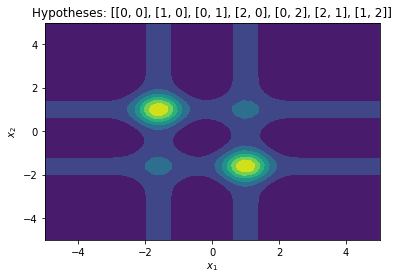

In [31]:
n = 2
Z = np.array([[-1.6],[1]])
m_o = len(Z)
H = np.array([1.0])
R = np.array([0.2])
PD = 0.6
rng = np.array([-5, 5])
V  = np.diff(rng)
lamc = lambda c: 0.3 if np.abs(c) <= 5 else 0
lamc_bar = lamc(0) * V

### REALLY INNEFICIENT WAY OF DOING IT, but does the job for ploting
def gaussian_lm(theta, X, Z, H, R, PD, lamc):
    n = len(Z)
    m = len(Z)
    m_o = np.sum(np.array(theta) != 0)
    
    f1 = np.exp(-lamc_bar) / math.factorial(m) # exponental part
    f2 = np.prod([lamc(Z[j]) for j in range(m)]) # clutter part
    p_miss = (1 - PD) ** (n - m_o) # misdetections part
    f3 = np.prod([PD / lamc(Z[t-1]) for t in theta if t != 0]) # detections factor
    
    p_detect = np.prod([multivariate_normal(X[i], R).pdf(Z[t-1]) for i, t in enumerate(theta) if t!= 0]) # measurement likelihoods
    return f1 * f2 * p_miss * f3 * p_detect

def get_hyp_contour(theta, N=50):
    N = 50
    x = np.linspace(-5, 5, N)
    x1, x2 = np.meshgrid(x, x)
    pos = np.zeros((N,N,3))
    pos[:,:,0] = x1
    pos[:,:,1] = x2
    
    for t in theta:
        for i in range(N):
            for j in range(N):
                X = np.array([[x[j]],[x[i]]])
                pos[i, j, 2] += gaussian_lm(t, X, Z, H, R, PD, lamc)
    return pos

theta = [[0, 0],[1, 0],[0, 1],[2,0],[0,2],[2,1],[1,2]]
pos = get_hyp_contour(theta, N=50)

##
fig = plt.figure()
ax = plt.subplot(111)
plt.contourf(pos[:,:,0], pos[:,:,1], pos[:,:,2])
plt.title(f"Hypotheses: {theta}")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
plt.show()


The symmetry in the measurement likelihood function comes from the unknown data association. We know that there can be measurements but dont know to which objects they belong. Another explanation could be that the hypothesis indexin is arbitrary, we are not forced to label the objects up to down, left to right or any other rule. 

### Initial prior for N objects
There are two common possibilities to model the initial prior $p(X_0) = p(x_0^1,x_0^2,...,x_0^n)$ for $n$ objects and both of the rely on the assumption of initial independence and the assumed density filters. The possibilities in the asumed density are similar to SOT, namely, single Gaussian or less commonly a Gaussian mixture. This gives us two following factorizations of the joint density describing the initial prior:

$$
p(X_0) = p(x_0^1,x_0^2,...,x_0^n) = 
\begin{cases}
\prod_{i=1}^n \mathcal{N}(x_0^i: \mu_0^i, P_0^i) &
\text{for Gaussian}
\\
\sum_{h=1}^{H_0}w_0^h\prod_{i=1}^n \mathcal{N}(x_0^i: \mu_0^i, P_0^i)
& \text{for Gaussian mixture}
\end{cases}
$$

### Posterior
As for SOT and in general for problems under all Bayesian flitering framework the posterior is calculated using the Bayes rule. Given a prior and likelihood we similarly to SOT seek for a posterior expression as a sum over data associations factorizations into individual posteriors given association and association probabilities (or in other words weights):

$$
p(X_k|Z_{1:k}) \propto p(Z_k|X_k)p(X_k|Z_{1:k-1}) = \sum_{\theta_k}p(X_k|Z_{1:k,\theta_k})Pr[\theta_k|Z_{1:k-1}]
$$

#### Posterior from unimodal independent prior
Consider the uni-modal independent prior:

$$
p(X) = \prod_{i=1}^n p^i(x^i)
$$

Knowing the measurement likelihood from previous up to the proportionality constant we arrive at the following expression for the posterior:

$$
p(X|Z) \propto \sum_{\theta \in \Theta}
\prod_{i:\theta^i = 0}\left(1 - P^D(x^i)\right)
\prod_{i:\theta^i \neq 0}\frac{P^D(x^i)g(z^{\theta^i}|x^i)}{\lambda_c(z^{\theta^j})}\prod_{i=1}^n p^i(x^i) \\ 
=
\sum_{\theta \in \Theta}
\underbrace{\prod_{i:\theta^i = 0}\left(1 - P^D(x^i)\right)p^i(x^i)}_{\text{misdetected}}
\underbrace{\prod_{i:\theta^i \neq 0}\frac{P^D(x^i)g(z^{\theta^i}|x^i)}{\lambda_c(z^{\theta^j})}p^i(x^i)}_{\text{detected}}
$$

This gives us the summation over the products corresponding to un-normalized posteriors for single mistedected and detected object densities. We can normalize misdetected and detected parts similarly SOT applying the same formulas for weights and pdfs. We get the following.

$$
p(X|Z) = \sum_{\theta \in \Theta}\prod_{i=1}^n\tilde{w}^{\theta^i}p^{i,\theta^i}(x^i)
$$

where:

$$
\theta^i = 0 \Rightarrow
\begin{cases}
\tilde{w}^{\theta^i} = \int p^i(x^i)\left(1 - P^D(x^i)\right)dx^i
\\
p^{i,\theta^i}(x^i) = \frac{p(x^i)\left(1 - P^D(x^i)\right)}{\tilde{w}^{\theta^i}}
\end{cases}
\\
\theta^i \neq 0 \Rightarrow
\begin{cases}
\tilde{w}^{\theta^i} = \frac{1}{\lambda_c(z^{\theta^i})}\int p(x^i)P^D(x^i)g(z^{\theta^i}|x^i)dx^i
\\
p^{i,\theta^i}(x^i) = \frac{p(x^i)P^D(x^i)g(z^{\theta^i}|x^i)dx^i}{\tilde{w}^{\theta^i}}
\end{cases}
$$

The expression only normalizes the individual components and not the overall posterior $P(X|Z)$. Using the normalization the expression for the posterior factozizes into two products. We define product over weights over single object associations as the weight for $n$ object association $\tilde{w}^{\theta}$. Note, those weights are still unnormalized denoted by tilde. And the product over independent single object posterior densities is $n$ object posterior density $p^{\theta}(X)$ conditioned on the data association $\theta$.

$$
p(X|Z) \propto \sum_{\theta \in \Theta}\prod_{i=1}^n\tilde{w}^{\theta^i}\prod_{i=1}^np^{i,\theta^i}(x^i) = 
\sum_{\theta \in \Theta}\tilde{w}^{\theta}\prod_{i=1}^np^{i,\theta^i}(x^i) = \sum_{\theta \in \Theta}\tilde{w}^{\theta}p^{\theta}(X)
$$

The weghts are normalized in a standard way:

$$
w^{\theta} = \frac{\tilde{w}^{\theta}}{\sum_{\theta}\tilde{w}^{\theta}} = 
\frac{\prod_i\tilde{w}^{\theta^i}}{\sum_{\theta}\prod_i\tilde{w}^{\theta^i}}
$$

Same results can be acheived by calculating the normalization factor intergral from Bayes rule, but its not going to be shown here.

#### Posterior from unimodal independent prior (linear Gaussians)
Lets consider typical model with Gaussian prior and measurement likelihood. Also the probability of detection and clutter intensity are constant.
$$
p(X) = \prod_{i=1}^n\mathcal{N}(x^i:\mu^i, P^i) \\
p(Z|X) \propto \sum_{\theta \in \Theta}(1 - P^D)^{n - m_o}\prod_{i:\theta_i \neq 0}\frac{P^DV}{\bar{\lambda_c}}\mathcal{N}(z^{\theta^i}:Hx^i, R)
$$

The posterior then becomes:

$$
p(Z|X) \propto \sum_{\theta \in \Theta}\prod_{i=1}^n(1 - P^D)\mathcal{N}(x^i:\mu^i, P^i)
\prod_{i:\theta_i \neq 0}\frac{P^DV}{\bar{\lambda_c}}\mathcal{N}(z^{\theta^i}:Hx^i, R)\mathcal{N}(x^i:\mu^i, P^i)
$$

Our expression takes a form of factorization into two product terms that according to the previously learnt we can represent as $n$ object weight (everything that is independent on $x$) and $n$ posterior (dependent on $x$) given the hypothesis $\theta$. Applying the individual factors normalization trick gives:

$$
p(X|Z) \propto \tilde{w}^{\theta}\prod_i\mathcal{N}(x^i:\mu^{i,\theta^i}, P^{i,\theta^i}) \\
\tilde{w}^{\theta} = (1 - P^D)^{n - m_o}\left(\frac{P^DV}{\bar{\lambda_c}}\right)^{m_o}
\prod_{i:\theta_i \neq 0}\mathcal{N}(z^{\theta^i}:\hat{z}^i, S^i)
$$

The term $\mathcal{N}(x^i:\mu^{i,\theta^i}, P^{i,\theta^i})$ corresponds for a linear Kalman filter update for an object $i$ with the measurement $z^{\theta^i}$ and the procedure goes as follows:

1. If the object $i$ is detected meaning $\theta^i \neq 0$, get innovation  $y^{i,\theta^i} = z^{\theta^i} - \hat{z}^i$ from measurement estimate $\hat{z}^i = H\mu^i$ and sensor measurement $z^{\theta^i}$ associated with the object $i$.
2. Get innovation covariance $S^i = HP^iH^T + R$
3. get Kalman gain $K^i = P^iH^T(S^i)^-1$
4. update the state estimate depending on whether the object is detected or not:
$$
\mu^{i,\theta^i} =
\begin{cases}
\mu^i + K^iy^{i,\theta^i} & \text{ if } \theta^i \neq 0 \\
\mu^i & \text{ if } \theta^i = 0
\end{cases}
\\
P^{i,\theta^i} = 
\begin{cases}
P^i - K^iHP^i & \text{ if } \theta^i \neq 0 \\
P^i & \text{ if } \theta^i = 0
\end{cases}
$$

The innovation and its covariance are also used in the predicted likelihood $\mathcal{N}(z^{\theta^i}:\hat{z}^i, S^i)$ 

### Maybe visualization here?

### General posterior
Recap from SOT, general posterior expression looks as follows:
$$
p(x_k|Z_{1:k}) = \sum_{\theta_{1:k}}w^{\theta_{1:k}}p^{\theta_{1:k}}(x_{k}) \: \text{where:}
\\
\sum_{\theta_{1:k}} = \sum_{\theta_{1=0}}^{m_1}\sum_{\theta_{2=0}}^{m_2}...\sum_{\theta_{k=0}}^{m_k}
$$
The expression for the NOT looks very similar, the only difference is that we dont have a single data association hypothesis vector $\theta_k$ at timestep $k$ but a set of valid hypotheses $\theta_k \in \Theta_k$.
$$
p(X_k|Z_{1:k}) = \sum_{\theta_{1:k}}w^{\theta_{1:k}}p^{\theta_{1:k}}(X_{k}) \: \text{where:}
\\
\sum_{\theta_{1:k} \in \Theta_{1:k}} = \sum_{\theta_{1} \in \Theta_{1}}\sum_{\theta_{2} \in \Theta_{2}}...\sum_{\theta_{k} \in \Theta_{k}}
$$

After the first filter recursion the prior is not a unimodal function but a mixture of prior hypotheses $h$.
$$
p(x) = \sum_h w^hp^h(X) = \sum_hPr[h]p(X|h)
$$

This means that the posterior becomes a double sum over the prior hypotheses and current data associations. Applying the normalization we can define a new expression.
$$
p(X|Z) \propto \left[\sum_{\theta \in \Theta}p(Z,\theta|X)\right]\left[\sum_h w^hp^h(X)\right] = \sum_h\sum_{\theta \in \Theta}w^hp(Z,\theta|X)p^h = \sum_h\sum_{\theta \in \Theta}w^h\tilde{w}^{\theta|h}\frac{p(Z,\theta|X)p^h(X)}{\tilde{w}^{\theta|h}} = \sum_h\sum_{\theta \in \Theta}\tilde{w}^{h,\theta}p^{h,\theta}(X)
$$

where:

$$
\tilde{w}^{\theta|h} = \int p(Z,\theta|X)p^h(X)dX = p(Z,\theta|h)
$$

The normalized version of the mixture posterior is then:

$$
p(X|Z) = \sum_h\sum_{\theta \in \Theta}\tilde{w}^{\theta|h}p^{\theta|h}(X) = \sum_h\sum_{\theta \in \Theta}Pr[h,\theta]p(X|h,\theta) \\
w^{h,\theta} = \frac{w^{\theta|h}w^h}{\sum_h\sum_{\theta \in \Theta}w^{\theta|h}w^h}
$$



### Modelling motion of N objects
We need to describe how the $n$ states evolve from $X_{k-1}^i$ to the next time step $x_k^i$ with a transition density.
$$
p(X_k|X_k) = p_k(x_k^1,x_k^2,...,x_k^n|x_{k-1}^1,x_{k-1}^2,...,x_{k-1}^n)
$$
And the simplifying assumption is that the time evolution of the objects is independent:
$$
p(X_k|X_k) = \prod_{i=1}^n\pi_k(x_k^n|x_{k-1}^n)
$$
In addition, typically the same transition density $\pi_k$ is used for all objects but it is not the case. The indepence of the transition densities also means that each object is predicted independently of other objects and the prediction step for the single posterior becomes:
$$
p_{k|k-1}(X_k) = \prod_{i}^{n}p_{k|k-1}^i(x_k^i)
$$
For the mixture posterior can predict individual components independently and the weights remain the same.
$$
p_{k|k-1}(X_k) = \sum_h w_{k|k-1}^h p_{k|k-1}^h(X_k^i)
$$

#### Gaussian mixture posterior and linear Gaussian transition density case

### Look at the independent assumptions
In our modelling we ofen assumed the independence condition for particular qualtits like:

1. Initial prior density
2. Measurements
3. Object motion

Does it also mean that the object states are independent? This is not true, in the general case at least. The objects are independent for a single hypothesis, however the total posterior is the mixture represented by the summation over all hypotheses therefore:

$$
p(X) = \sum_h w^h \prod_{i=1}^n p^{i,h}(x^i) \neq \prod_{i=1}^n\sum_{h^i}w^{h^i}p^{i,h^i}(x^i)
$$

### Data association optimization
One of the biggeste problems in our recursive algorithm is rapidly growing number of data associations. Just after one recursion with $h$ hypotheses we get $N_A(m,n)$ new hypotheses for every hypothesis. We want to find a subset of data associations that is way smaller than the original set and has only the largest weights. We also want to avoid computing all valid hypotheses and compare their weights. A solution is to pose this problem a special optimization problem called **assignment problem**. 

#### Assignment problem
Three workers $w_1, w_2, w_3$ and three tasks $t_1, t_2, t_3$ each worker gives a cost for each task as follows:

| $w/t$ | $t_1$ | $t_2$ | $t_3$ |
| --- | --- | --- | --- |
| $w_1$ | $5$ | $8$ | $7$ |
| $w_2$ | $8$ | $12$ | $7$ |
| $w_3$ | $4$ | $8$ | $5$ |

Each worker can only take 1 task and each task can only be solved by 1 worker. We want to assign workers to tasks such that each worker has something to do, each task is performed and the most importantly the cost is as low as possible. We can also assign tasks to workers and the same assignment will be optimal. Later we would want to do the same with $n$ objects and $m$ measurements and define a special cost for them.

The matrix presented above is the cost matrix $L$ and the assignment matrix $A$ is the matrix of same size that reprsents assignments with 1 and the rest of the fields with 0. The cost of an assignment is then represented as:

$$
C = \sum_i \sum_j A^{i,j}L^{i,j} = tr(A^TL)
$$

Then the optimal assignment problem reads as follows. Given $L$ we seek the solution $A^*$ to the constrained minimization problem:

- minmize $tr(A^TL)$
- subject to $A^{i,j} \in \{0,1\}, \: \forall i,j$ (either assign or not)
- $\sum_j A^{i,j} = 1, \: \forall i$ (Each worker $i$ assigned one task $j$)
- $\sum_i A^{i,j} = 1, \: \forall j$ (Each task $j$ assigned one worker $i$)

#### Object tracking assigment matrix A
For a given hypothesis the optimal data association has the maximum weight which can be described as the product of the weights for each object. The maximization of the product can be re-written as the maximization of the sum of logarithms. In addition the maximization can be posed as negative minimization whic yields that the optimal data association $\theta*$ is a solution to the following problem:

$$
\theta^* = arg\min_{\theta \in \Theta}\sum_{i=1}^n-log(\tilde{w}^{\theta^i|h})
$$

The assignment matrix $A$ for $n$ object tracking should have a structure that corresponds to **unique valid associations** $\theta \in \Theta$. $A$ is a $n \times (m+n)$ matrix that assigns $n$ objects to $m$ detections and $n$ misdetections. The realationship between $\theta$ and $A$ is:

- Detection: $\theta^i = j \Rightarrow A^{i,j} = 1$
- Misdetection: $\theta_i = 0 \Rightarrow A^{i,m+i} = 1$

For example, $n=2$, $m=1$, $N_A(1,2)=3$:
$$
\theta=[0, 0] \Rightarrow A=
\left[
\begin{array}{c|cc}
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
$$

$$
\theta=[1, 0] \Rightarrow A=
\left[
\begin{array}{c|cc}
1 & 0 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
$$

$$
\theta=[0, 1] \Rightarrow A=
\left[
\begin{array}{c|cc}
0 & 1 & 0 \\
1 & 0 & 0 \\
\end{array}
\right]
$$

#### Object tracking cost matrix L
Applying the definition of weights from previous to our hypothesis optimization problme we get the following entries for the cost matrix:

- log-likelihood of misdetecting $x^i$: $l^{i,0,h} = \log\left( \int \left(1 - P^D(x^i)\right) p^{i,h}(x^i)dx^i\right)$
- log-likelihood of associating $x^i$ to $z^i$: $l^{i,j,h} = \log\left( \int \frac{P^D(x^i)}{\lambda_c(z^j)}(x^i)g(z^j|x^i)p^{i,h}(x^i)dx^i\right)$

Applying those equations to the simple scenario of Gaussian prior, linear Gaussian object measurement likelihood, constant probability of detection and uniform clutter intensity function we get:

$$
l^{i,0,h} = \log\left(1 - P^D\right) \\
l^{i,j,h} = \log\left(\frac{P^DV}{\bar{\lambda}}\right)
- \frac{1}{2}\log\left(\det(2\pi S^{i,h})\right)
- \frac{1}{2}\left(z^j - \hat{z}^{i,h}\right)(S^{i,h})^{-1}\left(z^j - \hat{z}^{i,h}\right)
$$

L will take a shape $n \times (m + n)$ with the same structure as the assignment matrix. The difference is that the off-diagonal terms in the misdetected part of the matrix are $\infty$ instead of $0$ to ensure that each invalid detection is heavily taxed by infinite cost.

#### Example
mention params

In [5]:
Calculate L, calculate 3 costs

[[ 4  5  8]
 [ 8  8 12]
 [ 5  7  7]]


#### Optimization solvers

#### Gating to reduce the optimization complexity